In [15]:
import torch
from torch.autograd import Variable
x = Variable(torch.Tensor([3]), requires_grad = True) 
y = Variable(torch.Tensor([5]), requires_grad = True)
z = 2*x + 10*y
z.backward()
print(z)
print(y.grad.data)


tensor([ 56.])
tensor([ 10.])


### 使用pytorch进行线性回归

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[20/1000], loss: 0.169054
Epoch[40/1000], loss: 0.169026
Epoch[60/1000], loss: 0.169006
Epoch[80/1000], loss: 0.168992
Epoch[100/1000], loss: 0.168982
Epoch[120/1000], loss: 0.168975
Epoch[140/1000], loss: 0.168970
Epoch[160/1000], loss: 0.168967
Epoch[180/1000], loss: 0.168964
Epoch[200/1000], loss: 0.168962
Epoch[220/1000], loss: 0.168961
Epoch[240/1000], loss: 0.168960
Epoch[260/1000], loss: 0.168959
Epoch[280/1000], loss: 0.168959
Epoch[300/1000], loss: 0.168959
Epoch[320/1000], loss: 0.168958
Epoch[340/1000], loss: 0.168958
Epoch[360/1000], loss: 0.168958
Epoch[380/1000], loss: 0.168958
Epoch[400/1000], loss: 0.168958
Epoch[420/1000], loss: 0.168958
Epoch[440/1000], loss: 0.168958
Epoch[460/1000], loss: 0.168957
Epoch[480/1000], loss: 0.168957
Epoch[500/1000], loss: 0.168957
Epoch[520/1000], loss: 0.168957
Epoch[540/1000], loss: 0.168957
Epoch[560/1000], loss: 0.168957
Epoch[580/1000], loss: 0.168957
Epoch[600/1000], loss: 0.168957
Epoch[620/1000], loss: 0.168957
Epoch[640/10

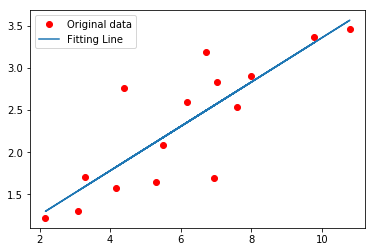

In [23]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        out = self.linear(x)
        return out
model = linearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    out = model.forward(inputs)
    loss = criterion(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()